In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D
from keras.layers import MaxPooling2D,Flatten
from keras.layers import Dropout,BatchNormalization
from keras.applications import Xception
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [ ]:
model=Sequential()

In [ ]:
input_shape=(128,128,3)
input_tensor=keras.Input(input_shape)

In [ ]:
xception=Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=input_tensor,
    input_shape=input_shape,
    pooling="max"
)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model.add(xception)

In [ ]:
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units=32,activation="relu"))

In [ ]:
model.add(Dense(units=3,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                131136    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 20,994,795
Trainable params: 20,940,267
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint=ModelCheckpoint('cricket_shot_detection.h5',
                           monitor="val_acc",
                           verbose=1,
                           save_best_only=True,
                           mode="max")

In [ ]:
callbacks=[checkpoint]

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/gdrive/My Drive/Data/training_set',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2916 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/gdrive/My Drive/Data/test_set',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 3 classes.


In [ ]:
nb_train_images=2916
nb_test_images=600
batch_size=32

In [ ]:
history=model.fit(training_set,
                  steps_per_epoch=nb_train_images//batch_size,
                  epochs=100,
                  validation_data=test_set,
                  validation_steps=nb_test_images//batch_size,
                  callbacks=callbacks)

Epoch 1/100
91/91 [==============================] - 679s 7s/step - loss: 0.9257 - accuracy: 0.5492 - val_loss: 1.4474 - val_accuracy: 0.4271
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


91/91 [==============================] - 56s 614ms/step - loss: 0.7819 - accuracy: 0.6439 - val_loss: 1.1389 - val_accuracy: 0.5176
Epoch 3/100
91/91 [==============================] - 56s 617ms/step - loss: 0.7428 - accuracy: 0.6761 - val_loss: 0.6433 - val_accuracy: 0.6549
Epoch 4/100
91/91 [==============================] - 56s 618ms/step - loss: 0.6648 - accuracy: 0.7327 - val_loss: 0.8330 - val_accuracy: 0.6778
Epoch 5/100
91/91 [==============================] - 56s 616ms/step - loss: 0.5619 - accuracy: 0.7743 - val_loss: 0.4926 - val_accuracy: 0.7535
Epoch 6/100
91/91 [==============================] - 56s 616ms/step - loss: 0.5638 - accuracy: 0.7784 - val_loss: 0.9132 - val_accuracy: 0.7412
Epoch 7/100
91/91 [==============================] - 56s 617ms/step - loss: 0.4956 - accuracy: 0.8072 - val_loss: 0.3349 - val_accuracy: 0.7694
Epoch 8/100
91/91 [==============================] - 56s 611ms/step - loss: 0.4339 - accuracy: 0.8284 - val_loss: 0.6624 - val_accuracy: 0.8028
Epoc

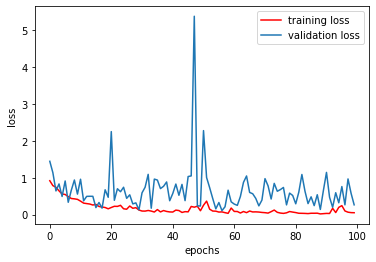

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

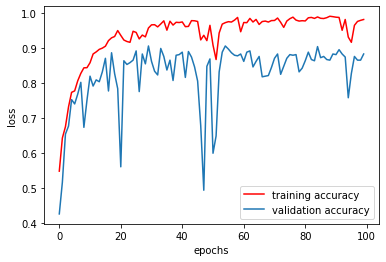

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model1=Sequential()
model1.add(xception)
model1.add(Dense(units=64,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(units=32,activation="relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Dense(units=3,activation="softmax"))
model1.summary()
model1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 2048)              20861480  
_________________________________________________________________
dense_4 (Dense)              (None, 64)                131136    
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_6 (Batch (None, 32)                128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [ ]:
checkpoint1=ModelCheckpoint('cricket_shot_detection1.h5',
                           monitor="val_loss",
                           verbose=1,
                           save_best_only=True,
                           mode="min")

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystopping=EarlyStopping(monitor="val_loss",
                            min_delta=0,
                            patience=5,
                            verbose=1,
                            mode="min",
                            restore_best_weights=True)

In [ ]:
reducelr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=5,
                           verbose=1,
                           mode="min",
                           min_delta=0.00001)

In [ ]:
callbacks1=[checkpoint1,earlystopping,reducelr]

In [ ]:
history1=model1.fit(training_set,
                    steps_per_epoch=nb_train_images//batch_size,
                    epochs=100,
                    validation_data=test_set,
                    validation_steps=nb_test_images//batch_size,
                    callbacks=callbacks1)

Epoch 1/100
91/91 [==============================] - 70s 767ms/step - loss: 0.1554 - accuracy: 0.9577 - val_loss: 0.4314 - val_accuracy: 0.8524

Epoch 00001: val_loss improved from inf to 0.43142, saving model to cricket_shot_detection1.h5
Epoch 2/100
91/91 [==============================] - 56s 618ms/step - loss: 0.0862 - accuracy: 0.9778 - val_loss: 0.4123 - val_accuracy: 0.8504

Epoch 00002: val_loss improved from 0.43142 to 0.41226, saving model to cricket_shot_detection1.h5
Epoch 3/100
91/91 [==============================] - 56s 618ms/step - loss: 0.0904 - accuracy: 0.9754 - val_loss: 0.6451 - val_accuracy: 0.8838

Epoch 00003: val_loss did not improve from 0.41226
Epoch 4/100
91/91 [==============================] - 56s 617ms/step - loss: 0.1224 - accuracy: 0.9688 - val_loss: 0.3762 - val_accuracy: 0.8592

Epoch 00004: val_loss improved from 0.41226 to 0.37617, saving model to cricket_shot_detection1.h5
Epoch 5/100
91/91 [==============================] - 56s 616ms/step - loss: 

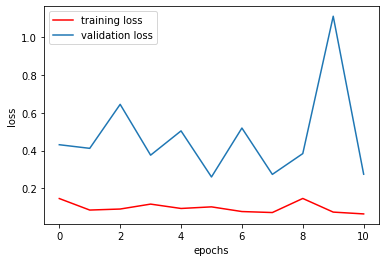

In [ ]:
plt.plot(history1.history['loss'],'r',label='training loss')
plt.plot(history1.history['val_loss'],label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

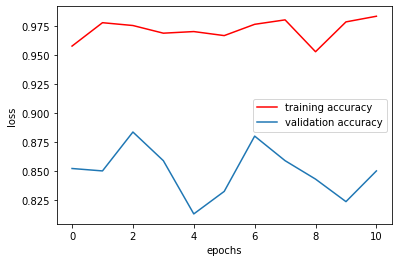

In [ ]:
plt.plot(history1.history['accuracy'],'r',label='training accuracy')
plt.plot(history1.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
training_set.class_indices

{'Cover Drive': 0, 'Cut Shot': 1, 'Pull Shot': 2}

In [ ]:
from keras.preprocessing import image

In [ ]:
test_image=image.load_img('/content/gdrive/My Drive/Data/test_set/Cover Drive/cover_drive(73).jpg',target_size=(128,128))

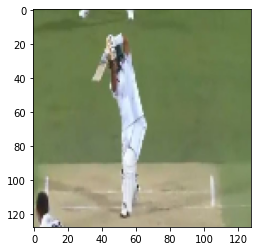

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis = 0)

In [ ]:
class_labels=["Cover Drive","Cut Shot","Pull Shot"]

In [ ]:
preds=model.predict(test_image)

In [ ]:
print(class_labels[preds.argmax()])

Cover Drive


In [ ]:
preds1=model1.predict(test_image)

In [ ]:
print(class_labels[preds1.argmax()])

Cover Drive
